# Skin Cancer MNIST: HAM10000

https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000/data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving HAM10000_metadata.csv to HAM10000_metadata.csv


In [ ]:
df = pd.read_csv('HAM10000_metadata.csv')
df.head(10)

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back


In [ ]:
df.shape

(10015, 7)

In [ ]:
df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [ ]:
df['dx'].value_counts()

,count
dx,
nv,6705
mel,1113
bkl,1099
bcc,514
akiec,327
vasc,142
df,115


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
image_path = r'C:\Users\User\Downloads\HAM10000'

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/HAM10000.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/images')


In [ ]:
import pandas as pd
import os

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HAM10000_metadata.csv')

image_dir = '/content/images/HAM10000'  # Вложенная папка
df['image_path'] = df['image_id'].apply(lambda x: os.path.join(image_dir, f'{x}.jpg'))


In [ ]:
import os
image_dir = '/content/images/HAM10000'
df['image_path'] = df['image_id'].apply(lambda x: os.path.join(image_dir, f'{x}.jpg'))

In [ ]:
df = df[df['lesion_id'].notnull()]

In [ ]:
unique_lesions = df['lesion_id'].unique()

In [ ]:
train_lesions, temp_lesions = train_test_split(unique_lesions, test_size=0.3, random_state=42)
val_lesions, test_lesions = train_test_split(temp_lesions, test_size=0.3333, random_state=42)

In [ ]:
df_train = df[df['lesion_id'].isin(train_lesions)]
df_val  = df[df['lesion_id'].isin(val_lesions)]
df_test  = df[df['lesion_id'].isin(test_lesions)]

In [ ]:
print(f"Train: {len(df_train)}, Val: {len(df_val)}, Test: {len(df_test)}")

Train: 6987, Val: 2017, Test: 1011


In [ ]:
from sklearn.preprocessing import LabelEncoder
from PIL import Image

In [ ]:
def load_img(path, size=(224, 224)):
    img = Image.open(path).convert('RGB')
    img = img.resize(size)
    img_arr = np.array(img) / 255.0  # нормализация
    return img_arr

In [ ]:
from PIL import Image

sample_path = df['image_path'][0]
print("Путь к файлу:", sample_path)
Image.open(sample_path).show()


Путь к файлу: /content/images/HAM10000/ISIC_0027419.jpg


In [ ]:
imags = np.stack([load_img(p) for p in df_train['image_path'][:10]])
print(imags.shape)

(10, 224, 224, 3)


In [ ]:
dx = {'nv': 'Меланоцитарный невус',
      'mel' : 'Меланома',
      'bkl': 'Кератозоподобное доброкачественное поражение',
      'bcc': 'Базальноклеточная карцинома',
      'akiec': 'Актинический кератоз / Болезнь Боуэна',
      'vasc': 'Сосудистые поражения',
      'df': 'Дерматофиброма'
}

df['dx'] = df['dx'].replace(dx)

In [ ]:
label_names = df['dx'].value_counts().index.tolist()
counts = df['dx'].value_counts().values


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
short_labels = list(range(1, len(label_names) + 1))
label_map = dict(zip(short_labels, label_names))


<ipython-input-27-7f77380f972d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=short_labels, y=counts, palette='Set2')


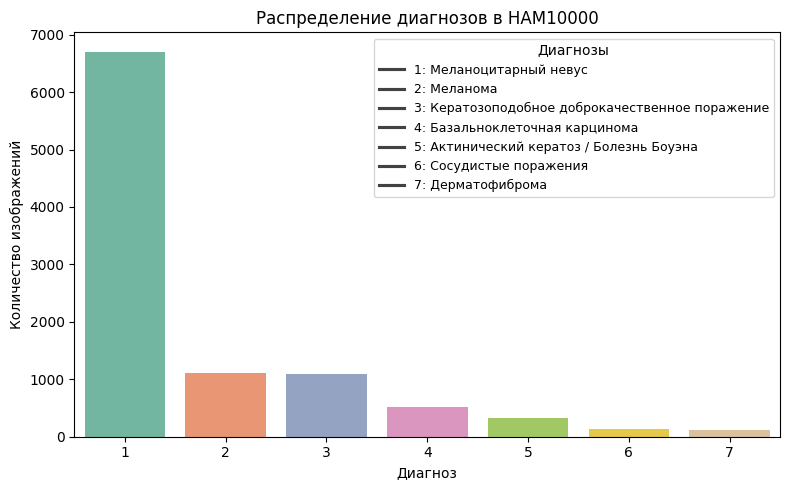

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=short_labels, y=counts, palette='Set2')
ax.set_title('Распределение диагнозов в HAM10000')
plt.xlabel('Диагноз')
plt.ylabel('Количество изображений')
legend_labels = [f"{i}: {label_map[i]}" for i in short_labels]
plt.legend(legend_labels, title='Диагнозы', fontsize=9, title_fontsize=10)
plt.tight_layout();

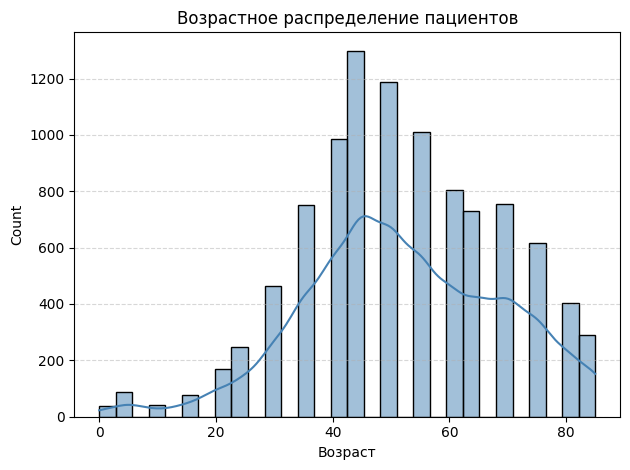

In [ ]:
sns.histplot(data=df, x='age', bins=30, kde=True, color='steelblue').set_title('Возрастное распределение пациентов')
plt.xlabel('Возраст')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout();

<ipython-input-29-a4a2a38ec5f4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sex', palette='pastel').set_title('Распределение по полу')


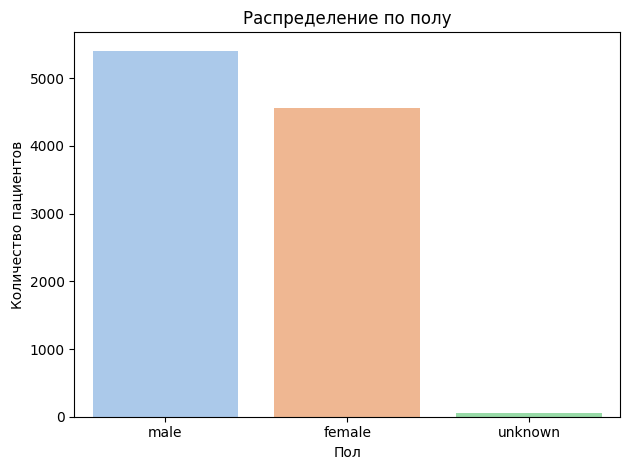

In [ ]:
sns.countplot(data=df, x='sex', palette='pastel').set_title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество пациентов')
plt.tight_layout();

In [ ]:
import random

In [ ]:
classes = df['dx'].unique()
samples = 3
img_size = (128, 128)

In [ ]:
# Создание подграфиков, количество строк равно числу классов
fig, axes = plt.subplots(len(classes), samples, figsize=(samples * 3, len(classes) * 3))
# Перебока всех классов (кожные заболевания)
for i, cls in enumerate(classes):
  # Фильтрация DF по текущему классу (dx - диагноз)
    cls_df = df[df['dx'] == cls]
    sample_paths = random.sample(cls_df['image_path'].tolist(), samples)
    for j, path in enumerate(sample_paths):
        image = Image.open(path).resize(img_size)
        axes[i, j].imshow(image)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(cls, fontsize=10)
plt.tight_layout();

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from torchvision import transforms, models
from PIL import Image
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import copy


In [ ]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['dx'])

In [ ]:
train_df, val_df = train_test_split(df, stratify=df['label'], test_size=0.2, random_state=42)

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2, 0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


In [ ]:
class SkinLesionDataset(Dataset):
    def __init__(self, df, transform=None):
        # Инициализация класса
        # transform - это функция преобразования изображения
        self.df = df.reset_index(drop=True)  # Сбрасывается индекс
        self.transform = transform

    def __len__(self):
        # Возвращается количество элементов в датасете
        return len(self.df)

    def __getitem__(self, idx):
        # Получается путь к изображению для текущего индекса
        image = Image.open(self.df.loc[idx, 'image_path']).convert('RGB')  # Открывается изображение и конвертируется в RGB
        # Получается метка для текущего изображения
        label = self.df.loc[idx, 'label']

        # Если преобразование изображения задано, оно применяется
        if self.transform:
            image = self.transform(image)

        # Возвращается изображение и метка
        return image, label


In [ ]:
train_dataset = SkinLesionDataset(train_df, transform=train_transform)
val_dataset = SkinLesionDataset(val_df, transform=val_transform)

In [ ]:
class_sample_counts = train_df['label'].value_counts().sort_index().values
weights = 1. / torch.tensor(class_sample_counts, dtype=torch.float)
sample_weights = weights[train_df['label'].values]
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_classes = len(le.classes_)
model = models.resnet50(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 134MB/s]


In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, gamma=2.0, alpha=None, reduction='mean'):
        # Инициализация параметров:
        # gamma - коэффициент для увеличения веса трудных примеров
        # alpha - вес для каждого класса (если задан)
        # reduction - метод агрегации потерь ('mean', 'sum' или 'none')
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        self.reduction = reduction

    def forward(self, inputs, targets):
        # Вычисление кросс-энтропию
        ce_loss = nn.functional.cross_entropy(inputs, targets, reduction='none')

        # Вычисление вероятности правильной классификации (
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss

        if self.alpha is not None:
            alpha_t = self.alpha.gather(0, targets)  #  вес для каждого класса
            focal_loss *= alpha_t

        # В зависимости от метода агрегации (reduction), возвращается итоговая потеря
        if self.reduction == 'mean':
            return focal_loss.mean()  # Усредненная потеря
        elif self.reduction == 'sum':
            return focal_loss.sum()  # Сумма потерь
        return focal_loss



In [ ]:
class_weights = train_df['label'].value_counts(normalize=True).sort_index()
alpha = (1. - class_weights).values
alpha = torch.tensor(alpha, dtype=torch.float32).to(device)

criterion = FocalLoss(gamma=2.0, alpha=alpha)
optimizer = optim.Adam(model.parameters(), lr=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

best_acc = 0
best_model = copy.deepcopy(model.state_dict())
patience = 5
patience_counter = 0

In [ ]:
# Запуск обучения на 10 эпох
for epoch in range(20):
    model.train()
    running_loss = 0.0  # Переменная для накопления потерь за эпоху

    # Процесс обучения
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)  # Перенос данных на нужное устройство (GPU/CPU)
        optimizer.zero_grad()  # Обнуляем градиенты
        outputs = model(images)
        loss = criterion(outputs, labels)  # Вычисление потери
        loss.backward()  # Вычисление градиентов
        optimizer.step()  # Обновление весов модели
        running_loss += loss.item()  # Накопление потерь за эпоху

    # Шаг оптимизатора с scheduler
    scheduler.step()
    print(f"Epoch {epoch+1}, Train Loss: {running_loss / len(train_loader):.4f}")  # Вывод средних потерь за эпоху

    # Валидация модели
    model.eval()
    all_preds, all_labels = [], []  # Списки для предсказаний и реальных меток
    with torch.no_grad():  # Отключение вычисления градиентов для ускорения работы
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)  # Выбор класса с максимальной вероятностью
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    #  точность на валидации
    acc = accuracy_score(all_labels, all_preds)
    print(f"\u2705 Validation Accuracy: {acc:.4f}")  # Вывод точности

    # Проверка на раннюю остановку
    if acc > best_acc:  # Если текущая точность лучше предыдущей
        best_acc = acc  # Обновление лучшей точности
        best_model = copy.deepcopy(model.state_dict())
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("\u274C Early stopping triggered")
            break

model.load_state_dict(best_model)
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=le.classes_))


Epoch 1, Train Loss: 0.6418
✅ Validation Accuracy: 0.5711
Epoch 2, Train Loss: 0.4449
✅ Validation Accuracy: 0.4363
Epoch 3, Train Loss: 0.3859
✅ Validation Accuracy: 0.6001
Epoch 4, Train Loss: 0.3610
✅ Validation Accuracy: 0.6126
Epoch 5, Train Loss: 0.3349
✅ Validation Accuracy: 0.6575
Epoch 6, Train Loss: 0.2536
✅ Validation Accuracy: 0.6645
Epoch 7, Train Loss: 0.2307
✅ Validation Accuracy: 0.6475
Epoch 8, Train Loss: 0.2238
✅ Validation Accuracy: 0.6680
Epoch 9, Train Loss: 0.2003
✅ Validation Accuracy: 0.6920
Epoch 10, Train Loss: 0.2075
✅ Validation Accuracy: 0.6690
Epoch 11, Train Loss: 0.1670
✅ Validation Accuracy: 0.7449
Epoch 12, Train Loss: 0.1520
✅ Validation Accuracy: 0.7014
Epoch 13, Train Loss: 0.1464
✅ Validation Accuracy: 0.6345
Epoch 14, Train Loss: 0.1398
✅ Validation Accuracy: 0.7599
Epoch 15, Train Loss: 0.1352
✅ Validation Accuracy: 0.7624
Epoch 16, Train Loss: 0.1190
✅ Validation Accuracy: 0.7154
Epoch 17, Train Loss: 0.1044
✅ Validation Accuracy: 0.7279
Epoch 